<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [24]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
# Task 1 getting to know the dataset
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [10]:
#task 1 getting to know the dataset 
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


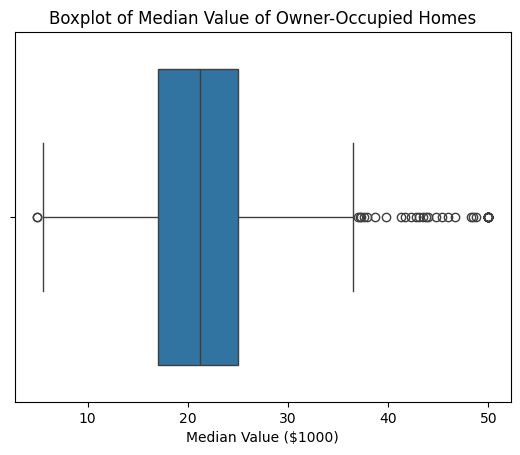

In [22]:
#task 2
sns.boxplot(x='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median Value ($1000)')
pyplot.show()

In [13]:
#This boxplot will show the distribution of the median value of owner-occupied homes, including the median, quartiles, and potential outliers.

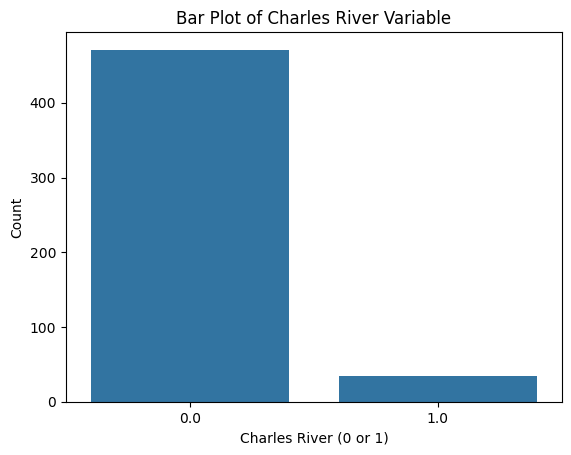

In [14]:
#task 2 
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River (0 or 1)')
pyplot.ylabel('Count')
pyplot.show()

In [15]:
#This bar plot will visualize the frequency of houses located near the Charles River (CHAS = 1) versus those not located near the river (CHAS = 0)

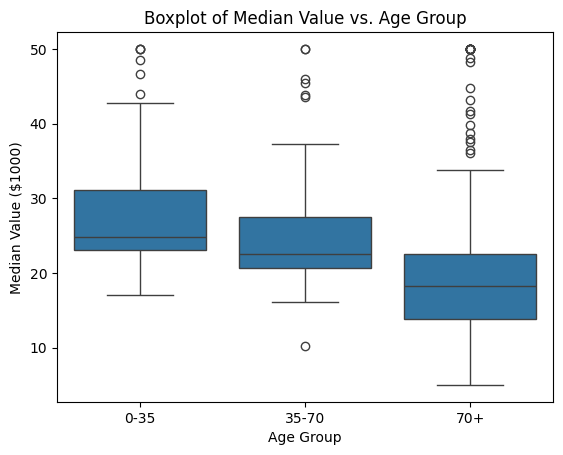

In [16]:
#task 2
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '35-70', '70+'])

sns.boxplot(x='Age_Group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value vs. Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value ($1000)')
pyplot.show()

In [17]:
#This boxplot will show how the median value of owner-occupied homes varies across different age groups.

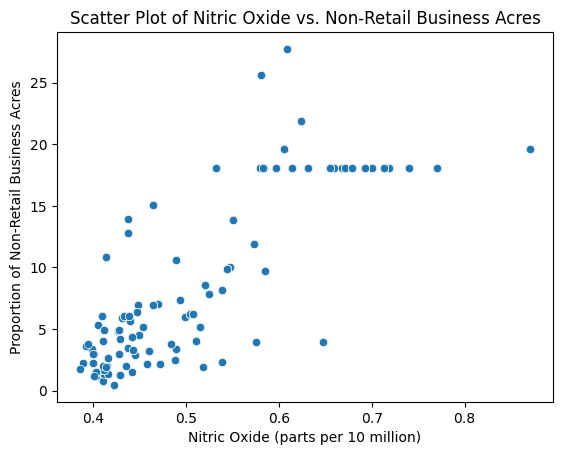

In [18]:
#task 2 
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatter Plot of Nitric Oxide vs. Non-Retail Business Acres')
pyplot.xlabel('Nitric Oxide (parts per 10 million)')
pyplot.ylabel('Proportion of Non-Retail Business Acres')
pyplot.show()

In [19]:
#This scatter plot will visualize the relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. 
#You can observe any trends or correlations between these two variables.

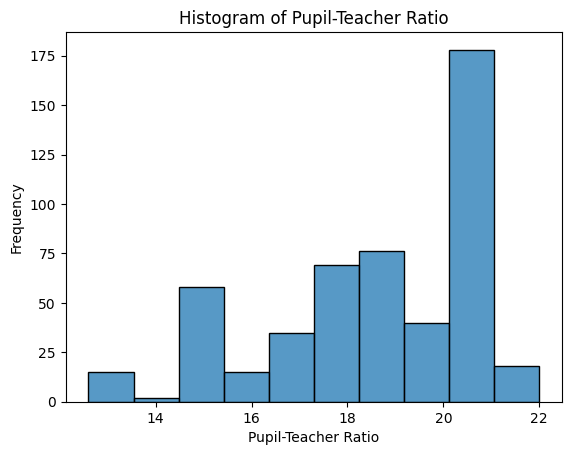

In [20]:
#task 2
sns.histplot(boston_df['PTRATIO'], bins=10)
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

In [25]:
#Independent t-test


df_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
df_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = stats.ttest_ind(df_chas_1, df_chas_0)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05


In [26]:
# P-value is greater than 0.05 thus there is no significant difference in median value of house bounded bythe charles river and those not bounded

In [27]:
#ANOVA

boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '35-70', '70+'])

f_stat, p_value = stats.f_oneway(
    boston_df['MEDV'][boston_df['Age_Group'] == '0-35'],
    boston_df['MEDV'][boston_df['Age_Group'] == '35-70'],
    boston_df['MEDV'][boston_df['Age_Group'] == '70+']
)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15


In [28]:
#there is no a significant difference in median values of houses for at least one of the age groups.

In [30]:
#Pearson Correlation

correlation_coef = boston_df['NOX'].corr(boston_df['INDUS'])
print("Correlation coefficient:", correlation_coef)

Correlation coefficient: 0.763651446920914


In [31]:
#Simple linear regression

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        19:01:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [35]:
'''The coefficient for the "DIS" variable represents the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.   
If the coefficient is significant (p-value < 0.05), it indicates that there is a relationship between distance and median value. 
The sign of the coefficient indicates the direction of the relationship (positive or negative).
'''

'The coefficient for the "DIS" variable represents the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes. \xa0 \nIf the coefficient is significant (p-value < 0.05), it indicates that there is a relationship between distance and median value. \nThe sign of the coefficient indicates the direction of the relationship (positive or negative).\n'